# Javascipt

https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/JavaScript%20Notebook%20Extensions.html

This allows you to quickly inject JavaScript into the notebook. Still the JavaScript injected this way will not survive reloading. Hence, it is a good tool for testing and refining a script.

You might see here and there people modifying css and injecting js into the notebook by reading file(s) and publishing them into the notebook. Not only does this often break the flow of the notebook and make the re-execution of the notebook broken, but it also means that you need to execute those cells in the entire notebook every time you need to update the code.

To inject JavaScript we provide an entry point: custom.js that allows the user to execute and load other resources into the notebook. JavaScript code in custom.js will be executed when the notebook app starts and can then be used to customize almost anything in the UI and in the behavior of the notebook.

In [ ]:
%%javascript
var allTableCells = document.getElementsByTagName("td");
for(var i = 0, max = allTableCells.length; i < max; i++) {
    var node = allTableCells[i];

    //get the text from the first child node - which should be a text node
    var currentText = node.childNodes[0].nodeValue; 

    //check for 'one' and assign this table cell's background color accordingly 
    if (currentText.includes("$ -"))
        node.style.color = "red";
}

<IPython.core.display.Javascript object>

In [ ]:

from jupyter_core.paths import jupyter_config_dir
jupyter_dir = jupyter_config_dir()
jupyter_dir



'/root/.jupyter'

In [ ]:
import os.path
custom_js_path = os.path.join(jupyter_dir, 'custom', 'custom.js')

In [ ]:

#  my custom js
if os.path.isfile(custom_js_path):
    with open(custom_js_path) as f:
        print(f.read())
else:
    print("You don't have a custom.js file")



You don't have a custom.js file


Note that custom.js is meant to be modified by user. When writing a script, you can define it in a separate file and add a line of configuration into custom.js that will fetch and execute the file.

Warning : even if modification of custom.js takes effect immediately after browser refresh (except if browser cache is aggressive), creating a file in static/ directory needs a server restart.

In [ ]:
%%javascript
/* 
<div id="output-area">
  <span id="output-header"> </span>
  <div id="output-body"></div>
  <span id="output-footer"></span>
</div>
*/
var loadJS = function(url, implementationCode, location){
    var scriptTag = document.createElement('script');
    scriptTag.src = url;
    scriptTag.onload = implementationCode;
    scriptTag.onreadystatechange = implementationCode;
    location.appendChild(scriptTag);
};

var main = function(){
  var newDiv = document.createElement("div"); 
  var newContent = document.createTextNode("Starting Execution"); 
  newDiv.appendChild(newContent);
  var currentDiv = document.getElementById("output-body"); 
  currentDiv.appendChild(newDiv); 
  
  var label = $('<label/>').text('AutoScroll Limit:');
  var option1 = $('<option/>').attr('value', '2').text('disabled')
  var option2 = $('<option/>').attr('value', '2').text('2min (default)' )
  var select = $('<select/>').append( option1 ).append( option2 )
  // TODO:
  $(currentDiv).append( select )
  console.log(select)
  
  select.change(function() { var val = $(this).val(); $(currentDiv).html( val ) } );

  var time_m = [1,5,10,15,30];
  for (var i=0; i < time_m.length; i++) { var time = time_m[i];
    select.append($('<option/>').attr('value', time ).text(time+' min')); }
  
}

var jqueryUrl = "//ajax.googleapis.com/ajax/libs/jquery/1.6.4/jquery.min.js"
loadJS(jqueryUrl, main, document.body);

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
console.log(this)

<IPython.core.display.Javascript object>

In [ ]:
# Python
import IPython
from IPython.display import HTML

pystartlife = str(100)
HTML("<div id='textid'>" + pystartlife + "</div>")

In [ ]:
%%javascript

// Get the python variable from the DOM
var startlife = 100;

console.log(startlife)

// Define a User class with a method
function User() {
    this.name = '';
    this.life = Number(startlife);
    this.giveLife = function giveLife(targetPlayer) {
        targetPlayer.life += 1;
        this.life -= 1;
    }
}

// Use class
var Alfred = new User();
var Wallace = new User();

// Names were blank so give them name values
Alfred.name = 'Alfred';
Wallace.name = 'Wallace';

// Let's play a game!

// Let Alfred give life to Wallace
Alfred.giveLife(Wallace);

<IPython.core.display.Javascript object>

https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=bn4q0OAA0ek5

https://ipython.readthedocs.io/en/stable/config/custommagics.html#

https://switowski.com/python/ipython/2019/02/08/creating-magic-functions-part2.html

https://switowski.com/python/ipython/2019/02/01/creating-magic-functions-part1.html

### misc

In [ ]:
from google.colab import files

# Upload
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Download
with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

In [ ]:
! {'cd ../../var/www/html && ls'}

/bin/bash: line 0: cd: ../../var/www/html: No such file or directory


## Serving resources

In [ ]:
%%html
<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <title>jQuery.getScript demo</title>
  <style>
  .block {
     background-color: blue;
     width: 150px;
     height: 70px;
     margin: 10px;
  }
  </style>
  <script src="https://code.jquery.com/jquery-1.10.2.js"></script>
</head>
<body>
 
<button id="go">&raquo; Run</button>
<div class="block"></div>
 
<script>
var url = "https://code.jquery.com/color/jquery.color.js";
$.getScript( url, function() {
  $( "#go" ).click(function() {
    $( ".block" )
      .animate({ backgroundColor: "rgb(255, 180, 180)" }, 1000 )
      .delay( 500 )
      .animate({ backgroundColor: "olive" }, 1000 )
      .delay( 500 )
      .animate({ backgroundColor: "#00f" }, 1000 );
  });
});
</script>
 
</body>
</html>

In [ ]:
!{'cd ../../var/www/html/ && ls'}

/bin/bash: line 0: cd: ../../var/www/html/: No such file or directory


# Advanced Outputs

https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=SucxddsPhOmj

## Serving resources

In [ ]:
%%html
<link rel="stylesheet" href="/nbextensions/google.colab/tabbar.css">
<div class='goog-tab'>
  Some content
</div>

## Cross-output communication

The output of each cell is hosted in a separate sandboxed iframe without direct access to the contents of other cells, but they can create [BroadcastChannel](https://developer.mozilla.org/en-US/docs/Web/API/BroadcastChannel/BroadcastChannel)s to communicate between cells.

In [ ]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

<IPython.core.display.Javascript object>

This second cell will be in a separate sandboxed iframe.


In [ ]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('Hello world!');

<IPython.core.display.Javascript object>

## Camera Capture

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


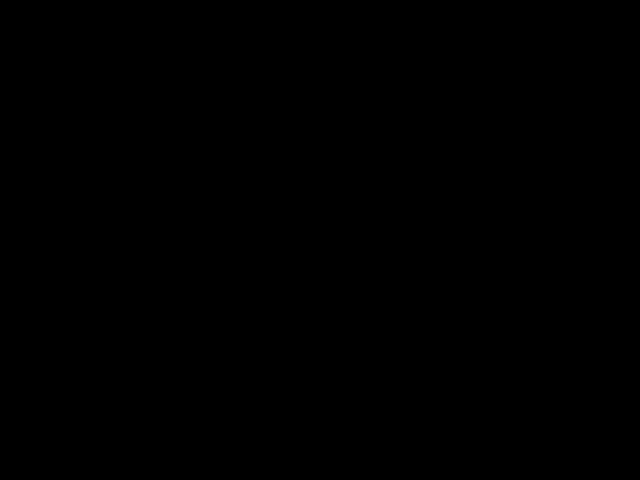

In [ ]:
from IPython.display import Image
filename = take_photo()
print('Saved to {}'.format(filename))

# Show the image which was just taken.
display(Image(filename))

# Javascipt

https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/JavaScript%20Notebook%20Extensions.html

This allows you to quickly inject JavaScript into the notebook. Still the JavaScript injected this way will not survive reloading. Hence, it is a good tool for testing and refining a script.

You might see here and there people modifying css and injecting js into the notebook by reading file(s) and publishing them into the notebook. Not only does this often break the flow of the notebook and make the re-execution of the notebook broken, but it also means that you need to execute those cells in the entire notebook every time you need to update the code.

To inject JavaScript we provide an entry point: custom.js that allows the user to execute and load other resources into the notebook. JavaScript code in custom.js will be executed when the notebook app starts and can then be used to customize almost anything in the UI and in the behavior of the notebook.

In [ ]:
%%javascript
var allTableCells = document.getElementsByTagName("td");
for(var i = 0, max = allTableCells.length; i < max; i++) {
    var node = allTableCells[i];

    //get the text from the first child node - which should be a text node
    var currentText = node.childNodes[0].nodeValue; 

    //check for 'one' and assign this table cell's background color accordingly 
    if (currentText.includes("$ -"))
        node.style.color = "red";
}

<IPython.core.display.Javascript object>

In [ ]:
from jupyter_core.paths import jupyter_config_dir
jupyter_dir = jupyter_config_dir()
jupyter_dir



'/root/.jupyter'

In [ ]:
import os.path
custom_js_path = os.path.join(jupyter_dir, 'custom', 'custom.js')

In [ ]:

#  my custom js
if os.path.isfile(custom_js_path):
    with open(custom_js_path) as f:
        print(f.read())
else:
    print("You don't have a custom.js file")



You don't have a custom.js file


Note that custom.js is meant to be modified by user. When writing a script, you can define it in a separate file and add a line of configuration into custom.js that will fetch and execute the file.

Warning : even if modification of custom.js takes effect immediately after browser refresh (except if browser cache is aggressive), creating a file in static/ directory needs a server restart.

In [ ]:
%%javascript
/* 
<div id="output-area">
  <span id="output-header"> </span>
  <div id="output-body"></div>
  <span id="output-footer"></span>
</div>
*/
var loadJS = function(url, implementationCode, location){
    var scriptTag = document.createElement('script');
    scriptTag.src = url;
    scriptTag.onload = implementationCode;
    scriptTag.onreadystatechange = implementationCode;
    location.appendChild(scriptTag);
};

var main = function(){
  var newDiv = document.createElement("div"); 
  var newContent = document.createTextNode("Starting Execution"); 
  newDiv.appendChild(newContent);
  var currentDiv = document.getElementById("output-body"); 
  currentDiv.appendChild(newDiv); 
  
  var label = $('<label/>').text('AutoScroll Limit:');
  var option1 = $('<option/>').attr('value', '2').text('disabled')
  var option2 = $('<option/>').attr('value', '2').text('2min (default)' )
  var select = $('<select/>').append( option1 ).append( option2 )
  // TODO:
  $(currentDiv).append( select )
  console.log(select)
  
  select.change(function() { var val = $(this).val(); $(currentDiv).html( val ) } );

  var time_m = [1,5,10,15,30];
  for (var i=0; i < time_m.length; i++) { var time = time_m[i];
    select.append($('<option/>').attr('value', time ).text(time+' min')); }
  
}

var jqueryUrl = "//ajax.googleapis.com/ajax/libs/jquery/1.6.4/jquery.min.js"
loadJS(jqueryUrl, main, document.body);

<IPython.core.display.Javascript object>

In [ ]:
%%javascript?
console.log(this)

NameError: ignored

In [ ]:
# Python
from IPython.display import HTML

pystartlife = str(100)
HTML("<div id='textid'>" + pystartlife + "</div>")

In [ ]:
%%javascript

// Get the python variable from the DOM
var startlife = 100;

console.log(startlife)

// Define a User class with a method
function User() {
    this.name = '';
    this.life = Number(startlife);
    this.giveLife = function giveLife(targetPlayer) {
        targetPlayer.life += 1;
        this.life -= 1;
    }
}

// Use class
var Alfred = new User();
var Wallace = new User();

// Names were blank so give them name values
Alfred.name = 'Alfred';
Wallace.name = 'Wallace';

// Let's play a game!

// Let Alfred give life to Wallace
Alfred.giveLife(Wallace);

// Save these variables back to python variables to work with later
IPython.notebook.kernel.execute('Alfred_life="' + Alfred.life + '";');
IPython.notebook.kernel.execute('Wallace_life="' + Wallace.life + '";');

<IPython.core.display.Javascript object>

# Import external JS scripts in Google Colab html 

In [ ]:
from IPython.display import HTML, SVG
from IPython.core.magic import register_cell_magic

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
@register_cell_magic
def dojs(line, src):
  return HTML(f"""
  <p> hello </p>
  <script src="content/drive/My Drive/Colab Notebooks/files/testJavascript.js"></script>
  <script>
  {src} 
  </script>
  """)

In [ ]:
%%dojs
//...trying to use functions from testJavascript.js

In [ ]:
@register_cell_magic
def cmagic(line, cell):
    "my cell magic"
    return line, cell

In [ ]:
%%dojs
here is the content